In [1]:
# CODE TO PLOT MY CUSTOM OUTPUT

In [2]:
import math
import os.path
import numpy as np
import matplotlib as mpl
from matplotlib import rc
from matplotlib import pyplot as plt
from matplotlib import ticker as tker

In [3]:
def get_x_vals(interv, y):
	return range(0, len(y)*interv, interv)
def my_formatter_fun(x, p):
	scale_pow = 0
	return "$%d$" % (x / (10 ** scale_pow))

In [4]:
def metacompare_smoothed_comparison(smoothing_window_size, stuff2compare, name, ylabel, interval, num_datapts, num_trials, filename, ytickspacing=-1):
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.rcParams.update({'font.size': 22})

    plt.figure()
    ax = plt.axes()        
    ax.yaxis.grid(True)
    
    mins = []
    maxes = []
    
    num_steps_for_single_result = 10

    for h in range(len(stuff2compare)):
        variant = stuff2compare[h]
        results_to_compare = np.zeros((num_trials, num_datapts))
        num_nzero_trials = 0
        for i in range(num_trials):
            current_debug_folder = "../outputs/" + variant + "/0/" + str(i)
            if os.path.isfile(current_debug_folder + "/" + filename + ".npy"):
                curr_result = np.load(current_debug_folder + "/" + filename + ".npy")
                curr_result_cp = []
                for result in curr_result:
                    if math.isnan(result):
                        curr_result_cp.append(0)
                    else:
                        curr_result_cp.append(result)
                curr_result = curr_result_cp
                results_to_compare[num_nzero_trials, :] = curr_result[:num_datapts]
                num_nzero_trials += 1
        results_to_compare = results_to_compare[:num_nzero_trials, :]

        color = plt.rcParams['axes.prop_cycle'].by_key()['color'][h]
        for i in range(len(results_to_compare)):
            curr_means_list = np.convolve(results_to_compare[i, ::-1]/smoothing_window_size,np.ones(smoothing_window_size), 'valid')[::-1]
            maxes.append(np.max(curr_means_list))
            mins.append(np.min(curr_means_list))
            plt.plot(get_x_vals(interval, list(results_to_compare[i]))[smoothing_window_size-1:], curr_means_list, '-', linewidth=1.3, color=color, alpha=0.3)
        curr_means_list = np.convolve(np.mean(results_to_compare, axis=0)[::-1]/smoothing_window_size,np.ones(smoothing_window_size), 'valid')[::-1]
        plt.plot(get_x_vals(interval, list(results_to_compare[i]))[smoothing_window_size-1:], curr_means_list, '-', linewidth=2, color=color, label=variant.replace("_", " "))

    ylim_max_val = np.max(maxes) + (np.max(maxes)-np.min((0.0, np.min(mins))))/10
    ylim_min_val = np.max((0.0, np.min(mins) - 2))
    if ytickspacing < 0:
        ytickspacing = float((ylim_max_val-ylim_min_val)/10)
    
    scale_pow = 0
    ax.yaxis.set_major_locator(tker.MultipleLocator(ytickspacing))
    ax.get_xaxis().set_major_formatter(tker.FuncFormatter(my_formatter_fun))
    ax.set_xlabel('Iteration ' + '$(\\times 10^{{{0:d}}})$'.format(scale_pow))

    for line in ax.get_ygridlines():
        line.set_linestyle('--')
        line.set_color("#cccccc")

    plt.ylabel(ylabel)
    plt.xlim([0, (results_to_compare.shape[1]-1)*interval])
    plt.ylim([ylim_min_val,ylim_max_val])
    plt.legend(loc='upper center', prop={'size':13}, bbox_to_anchor=(0.5, -0.25))
    plt.savefig("../outputs/" + stuff2compare[0] + "/" + name + ".pdf", bbox_inches='tight', format='pdf')
    plt.show()

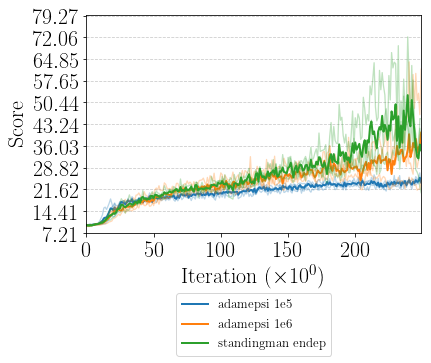

In [265]:
metacompare_smoothed_comparison(1, ["adamepsi_1e5", "adamepsi_1e6", "standingman_endep"], "fuckyou", "Score", 1, 250, 3, "ep_rewards_avged")

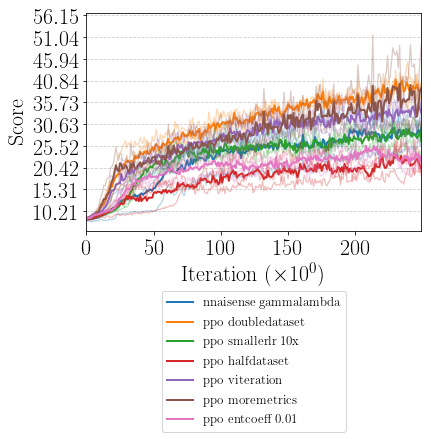

In [7]:
metacompare_smoothed_comparison(1, ["nnaisense_gammalambda", "ppo_doubledataset", "ppo_smallerlr_10x", "ppo_halfdataset", "ppo_viteration", "ppo_moremetrics", "ppo_entcoeff_0.01"], "fuckyou", "Score", 1, 250, 3, "ep_rewards_avged")

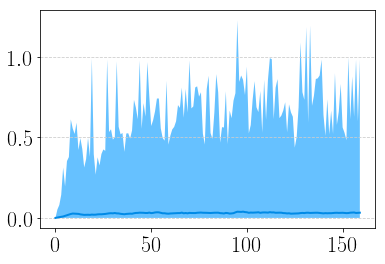

0.03243887051939964


In [238]:
plt.figure()
ax = plt.axes()        
ax.yaxis.grid(True)

rtheta_metrics = np.load("../outputs/adamepsi_1e6/0/2/rtheta_metrics_245.npy")
plt.plot(get_x_vals(1, list(range(np.shape(rtheta_metrics)[0]))), rtheta_metrics[:, 1], '-', color="#008ae6", linewidth=2)
plt.fill_between(get_x_vals(1, list(range(np.shape(rtheta_metrics)[0]))), rtheta_metrics[:, 0], rtheta_metrics[:, 2], edgecolor="", facecolor="#0099ff", alpha=0.6)

for line in ax.get_ygridlines():
    line.set_linestyle('--')
    line.set_color("#cccccc")

plt.show()

print(rtheta_metrics[-1, 1])

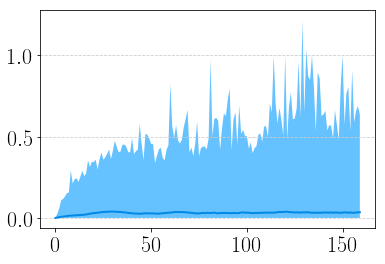

0.03469128906726837


In [239]:
plt.figure()
ax = plt.axes()        
ax.yaxis.grid(True)

rtheta_metrics = np.load("../outputs/standingman/0/0/rtheta_metrics_245.npy")
plt.plot(get_x_vals(1, list(range(np.shape(rtheta_metrics)[0]))), rtheta_metrics[:, 1], '-', color="#008ae6", linewidth=2)
plt.fill_between(get_x_vals(1, list(range(np.shape(rtheta_metrics)[0]))), rtheta_metrics[:, 0], rtheta_metrics[:, 2], edgecolor="", facecolor="#0099ff", alpha=0.6)

for line in ax.get_ygridlines():
    line.set_linestyle('--')
    line.set_color("#cccccc")

plt.show()

print(rtheta_metrics[-1, 1])

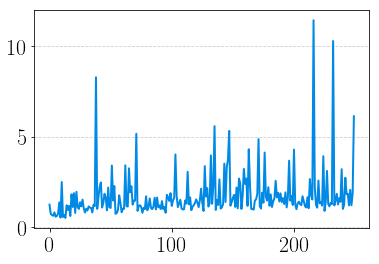

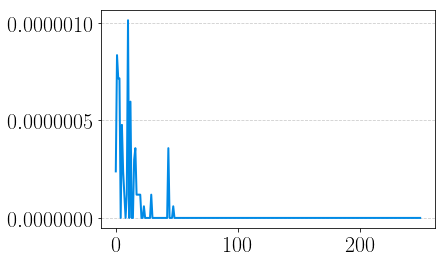

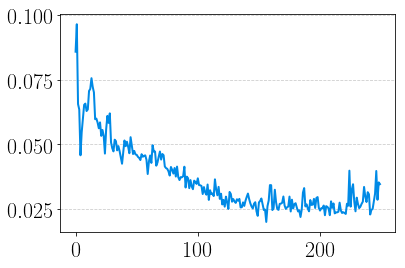

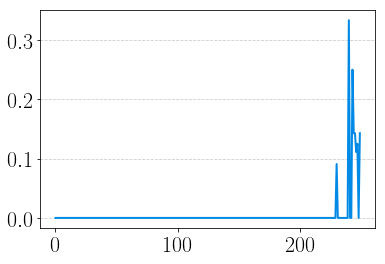

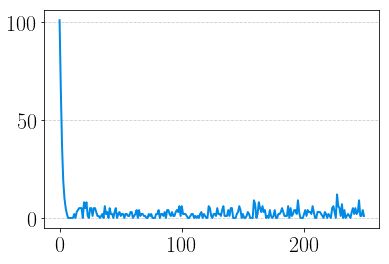

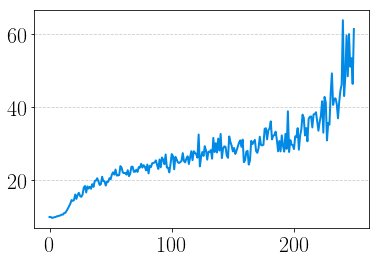

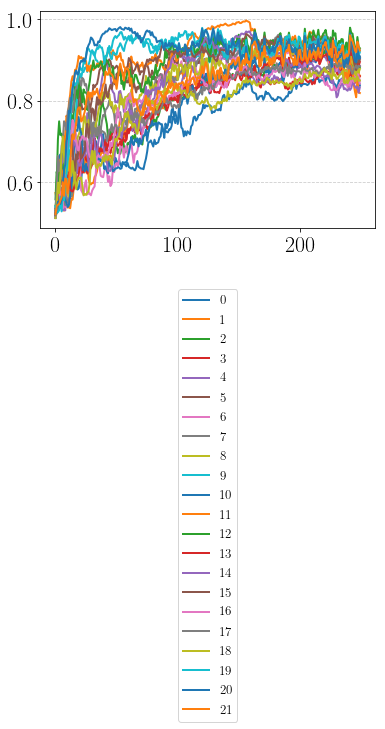

In [266]:
log_path = "../outputs/adamepsi_1e6/0/2"
num_ppo_iterations = 250
nb_actions = 22

max_eps = []
min_eps = []
mean_eps = []
for i in range(250):
    metrics_path = log_path + "/rtheta_metrics_" + str(i) + ".npy"
    if os.path.isfile(metrics_path):
        metrics = np.load(metrics_path)
        max_eps.append(np.amax(metrics[-50:, 2]))
        min_eps.append(np.amin(metrics[-50:, 0]))
        mean_eps.append(np.mean(metrics[-50:, 1]))
    else:
        break

plt.figure()
ax = plt.axes()        
ax.yaxis.grid(True)

plt.plot(get_x_vals(1, list(max_eps)), max_eps, '-', color="#008ae6", linewidth=2)

for line in ax.get_ygridlines():
    line.set_linestyle('--')
    line.set_color("#cccccc")

plt.show()

plt.figure()
ax = plt.axes()        
ax.yaxis.grid(True)

plt.plot(get_x_vals(1, list(min_eps)), min_eps, '-', color="#008ae6", linewidth=2)

for line in ax.get_ygridlines():
    line.set_linestyle('--')
    line.set_color("#cccccc")

plt.show()

plt.figure()
ax = plt.axes()        
ax.yaxis.grid(True)

plt.plot(get_x_vals(1, list(mean_eps)), mean_eps, '-', color="#008ae6", linewidth=2)

for line in ax.get_ygridlines():
    line.set_linestyle('--')
    line.set_color("#cccccc")

plt.show()

plt.figure()
ax = plt.axes()        
ax.yaxis.grid(True)

vf_discrepancy = np.load(log_path + "/timeout_fraction_avged.npy")

plt.plot(get_x_vals(1, list(vf_discrepancy)), vf_discrepancy, '-', color="#008ae6", linewidth=2)

for line in ax.get_ygridlines():
    line.set_linestyle('--')
    line.set_color("#cccccc")

plt.show()

plt.figure()
ax = plt.axes()        
ax.yaxis.grid(True)

vf_discrepancy = np.load(log_path + "/vf_discrepancy.npy")

plt.plot(get_x_vals(1, list(vf_discrepancy)), vf_discrepancy, '-', color="#008ae6", linewidth=2)

for line in ax.get_ygridlines():
    line.set_linestyle('--')
    line.set_color("#cccccc")

plt.show()

plt.figure()
ax = plt.axes()        
ax.yaxis.grid(True)

ep_rewards_avged = np.load(log_path + "/ep_rewards_avged.npy")

plt.plot(get_x_vals(1, list(ep_rewards_avged)), ep_rewards_avged, '-', color="#008ae6", linewidth=2)

for line in ax.get_ygridlines():
    line.set_linestyle('--')
    line.set_color("#cccccc")

plt.show()

plt.figure()
ax = plt.axes()        
ax.yaxis.grid(True)

all_action_probabilities_tracker = np.load(log_path + "/all_action_probabilities_tracker.npy")

for i in range(nb_actions):
    plt.plot(get_x_vals(1, list(all_action_probabilities_tracker[:, i])), all_action_probabilities_tracker[:, i], '-', linewidth=2, label=i)

for line in ax.get_ygridlines():
    line.set_linestyle('--')
    line.set_color("#cccccc")

plt.legend(loc='upper center', prop={'size':13}, bbox_to_anchor=(0.5, -0.25))
plt.show()


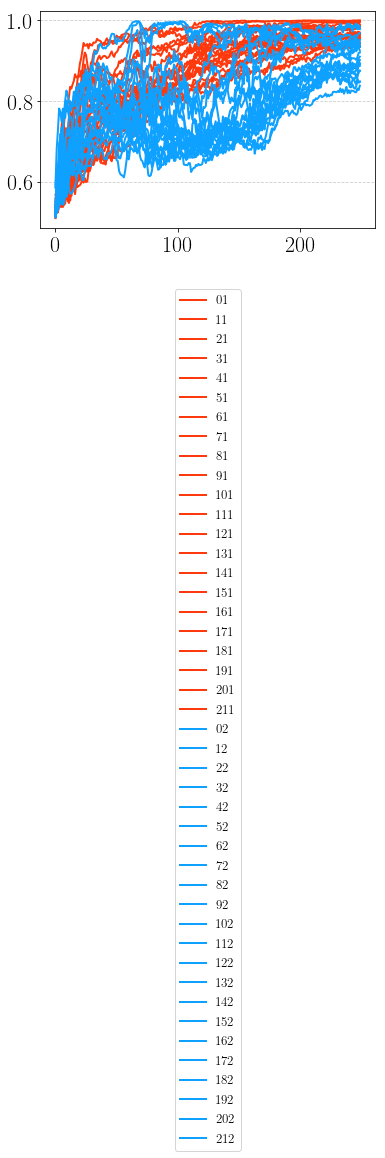

In [18]:
log_path1 = "../outputs/ppo_doubledataset/0/0"
log_path2 = "../outputs/nnaisense_gammalambda/0/1"
num_ppo_iterations = 250
nb_actions = 22
plt.figure()
ax = plt.axes()        
ax.yaxis.grid(True)

all_action_probabilities_tracker = np.load(log_path1 + "/all_action_probabilities_tracker.npy")

for i in range(nb_actions):
    plt.plot(get_x_vals(1, list(all_action_probabilities_tracker[:, i])), all_action_probabilities_tracker[:, i], '-', linewidth=2, label=str(i) + "1", color="#FF390E")

for line in ax.get_ygridlines():
    line.set_linestyle('--')
    line.set_color("#cccccc")

all_action_probabilities_tracker = np.load(log_path2 + "/all_action_probabilities_tracker.npy")

for i in range(nb_actions):
    plt.plot(get_x_vals(1, list(all_action_probabilities_tracker[:, i])), all_action_probabilities_tracker[:, i], '-', linewidth=2, label=str(i) + "2", color="#0EA1FF")

for line in ax.get_ygridlines():
    line.set_linestyle('--')
    line.set_color("#cccccc")

plt.legend(loc='upper center', prop={'size':13}, bbox_to_anchor=(0.5, -0.25))
plt.show()

